In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import glob # to find files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import math
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from zipfile import ZipFile
file_name ="/content/drive/MyDrive/PepercornDatasetResized224.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
data = []
labels = []

for folder in ['Anthracnose','Black Spot','Grey Mold','Healthy','Mixede','Powdery Mildew','White Spot','Yellowing Leaves']:
    images = glob.glob('/content/PepercornDatasetResizes224/%s/*.*'%folder)

    for i in range(len(images)):
        image = cv2.imread(images[i])
        try :
            image = cv2.resize(image, (224,224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            data.append(image)
            labels.append(folder)
        except :
            pass

In [ ]:
import numpy as np
import pandas as pd
data = np.array(data)
label = np.array(labels)

In [ ]:
from tensorflow.keras.preprocessing import image
# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

dict_ = {'Anthracnose': 0,
       'Black Spot': 1,
       'Grey Mold': 2,
         'Healthy': 3,
       'Mixed': 4,
         'Powdery Mildew': 5,
         'White Spot' : 6,
         'Yellowing Leaves' : 7}
label_dict = {0: 'Anthracnose', 1: 'Black Spot', 2: 'Grey Mold', 3: 'Healthy', 4: 'Mixed', 5: 'Powdery Mildew', 6: 'White Spot', 7: 'Yellowing Leaves'}

# Create an array of labels to apply the vectorized function to
labels = np.array([0, 1, 2, 3, 4, 5, 6,7])

# Use np.vectorize to get the corresponding labels
label = np.vectorize(label_dict.get)(labels)

print(label)


['Anthracnose' 'Black Spot' 'Grey Mold' 'Healthy' 'Mixed' 'Powdery Mildew'
 'White Spot' 'Yellowing Leaves']


In [ ]:
dict_ = {'Anthracnose':0,
       'Black Spot':1,
       'Grey Mold':2,
         'Healthy':3,
         'Mixed':4,
         'Powdery Mildew':5,
         'White Spot':6,
         'Yellowing Leaves':7}
label_dict = {0:'Anthracnose', 1:'Black Spot',2:'Grey Mold', 3:'Healthy',4:'Mixed',5:'Powdery Mildew',6:'White Spot',7:'Yellowing Leaves'}
label = np.vectorize(dict_.get)(label)

In [ ]:
train_images_reshaped = data.reshape((-1, 224, 224,3))
train_labels_reshaped = to_categorical(label, num_classes=8)

In [ ]:
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model2cc.h5'
train_data_dir = '/content/PepercornDatasetResized224/TrainingDataset'
validation_data_dir = '/content/PepercornDatasetResized224/TastingDataset'

 # number of epochs to train top model
epochs = 35
 # batch size used by flow_from_directory and predict_generator
batch_size = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
     train_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))
bottleneck_features_train = model.predict(
     generator, steps=predict_size_train)

Found 4807 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 325ms/step


In [ ]:
np.save('bottleneck_features_train2cc.npy', bottleneck_features_train)

In [ ]:
 generator = datagen.flow_from_directory(
     '/content/PepercornDatasetResized224/TastingDataset',
     target_size=(224, 224),
     batch_size=batch_size,
     class_mode='categorical',
     shuffle=False)

 nb_validation_samples = len(generator.filenames)

 predict_size_validation = int(math.ceil(nb_validation_samples /batch_size))

 # Replace the deprecated 'predict_generator' with 'predict'
bottleneck_features_validation = model.predict(
     generator, steps=predict_size_validation)

np.save('bottleneck_features_validation2cc.npy', bottleneck_features_validation)

Found 1201 images belonging to 8 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


In [ ]:
datagen_top = ImageDataGenerator(rescale=1./255)
generator_top = datagen_top.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

train_data = np.load('bottleneck_features_train2cc.npy')
train_labels = generator_top.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 4807 images belonging to 8 classes.


In [ ]:
generator_top = datagen_top.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation2cc.npy')

validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 1201 images belonging to 8 classes.


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,424,840 (24.51 MB)

 Trainable params: 6,424,840 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
          epochs=35,
          batch_size=64,
          validation_data=(validation_data, validation_labels))

#model.save_weights('top_model_weights2cc.h5')

(eval_loss, eval_accuracy) = model.evaluate(
     validation_data, validation_labels, batch_size=batch_size, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

Epoch 1/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9734 - loss: 0.0648 - val_accuracy: 0.9833 - val_loss: 0.0759
Epoch 2/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9819 - loss: 0.0502 - val_accuracy: 0.9858 - val_loss: 0.0599
Epoch 3/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9797 - loss: 0.0515 - val_accuracy: 0.9883 - val_loss: 0.0483
Epoch 4/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9709 - loss: 0.0668 - val_accuracy: 0.9792 - val_loss: 0.0886
Epoch 5/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9698 - loss: 0.0806 - val_accuracy: 0.9892 - val_loss: 0.0453
Epoch 6/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9744 - loss: 0.0674 - val_accuracy: 0.9908 - val_loss: 0.0312
Epoch 7/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9779 - loss: 0.0604 - val_accuracy: 0.9900 - val_loss: 0.0366
Epoch 8/35
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9807 - loss: 0.0554 - val_accuracy: 0.9917 - val_loss

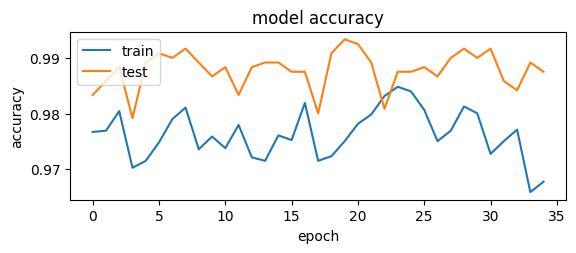

In [ ]:
model.save_weights('top_model.weights.h5')
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

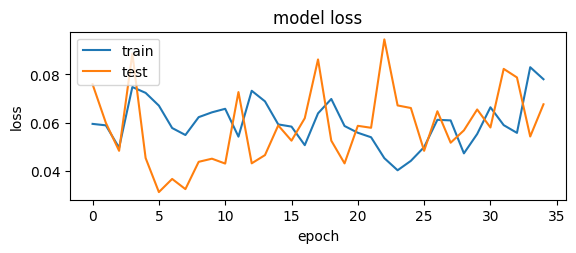

In [ ]:
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

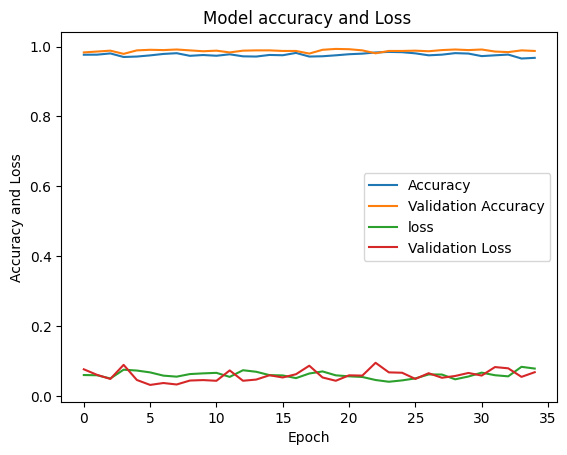

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model accuracy and Loss ")
plt.ylabel("Accuracy and Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
def load_img(path):
    image_path = path

    orig = cv2.imread(image_path)
    plt.imshow(orig)
    image = cv2.resize(orig, (224,224))
    #image = tf.reshape(image, [224,224])
    #img=image.img_to_array(img)
    #image = tf.cast(image, tf.float32)
    image = tf.keras.preprocessing.image.img_to_array(image)

    image = image / 255

    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def predict_img(image):
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    bottleneck_prediction = model.predict(image)

    model = Sequential()
    model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.load_weights('top_model.weights.h5')

    #class_predicted = model.predict_classes(bottleneck_prediction)
    predict_x=model.predict(bottleneck_prediction)
    class_predicted=np.argmax(predict_x,axis=1)
    return label_dict[class_predicted[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


'Anthracnose'

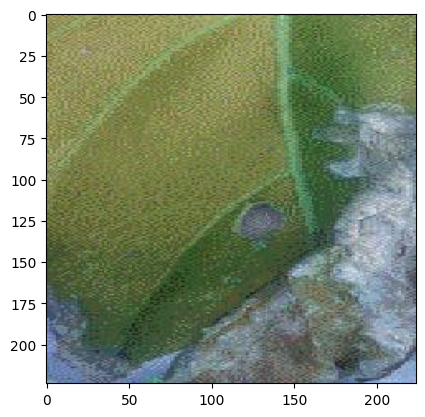

In [ ]:
predict_img(load_img('/content/PepercornDatasetResized224/TastingDataset/Anthracnose/102.jpg'))

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#We will make image class predictions through this model using the test data set
#Making prediction
#y_pred=model.predict_classes(validation_data)
#y_true=np.argmax(validation_labels,axis=1)

predict_x=model.predict(validation_data)
y_pred=np.argmax(predict_x,axis=1)
y_true=np.argmax(validation_labels,axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

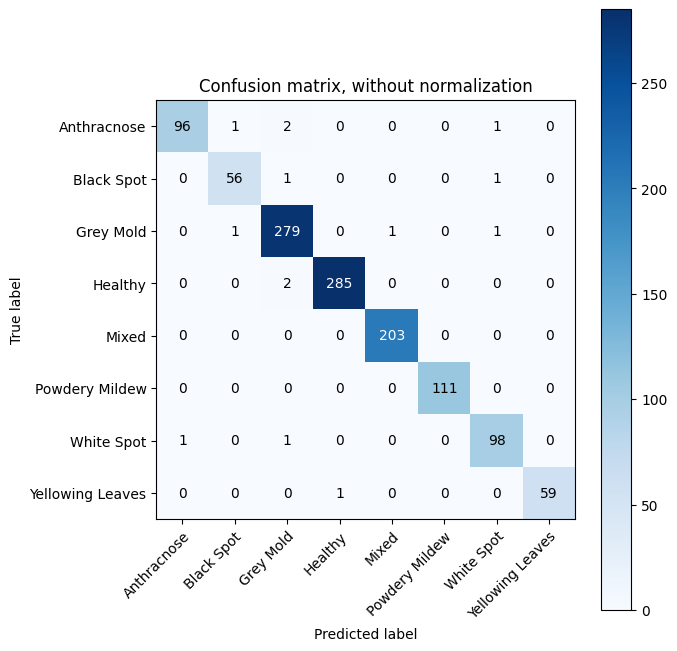

In [ ]:
from sklearn.metrics import confusion_matrix
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=['Anthracnose','Black Spot','Grey Mold','Healthy','Mixed','Powdery Mildew','White Spot', 'Yellowing Leaves']

#Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

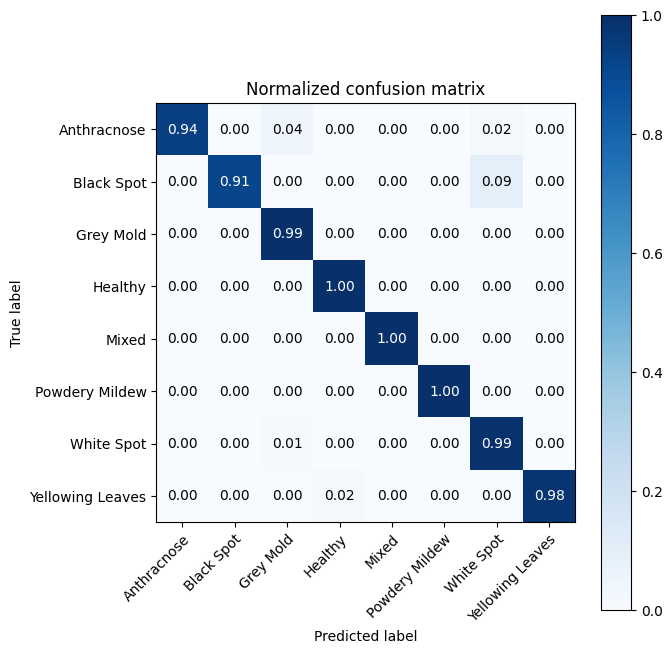

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

In [ ]:
accuracy = model.evaluate(validation_data, validation_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])
print('\n', 'Loss_Accuracy:-', accuracy[0])

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9721 - loss: 0.1759

 Test_Accuracy:- 0.9875103831291199

 Loss_Accuracy:- 0.06761592626571655


In [ ]:
from sklearn.metrics import classification_report
preds = np.round(model.predict(validation_data),0)
import sklearn.metrics as metrics

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
view = ['Anthracnose','Black Spot','Grey Mold','Healthy','Mixed','Powdery Mildew','White Spot','Yellowing Leaves']
classification_metrics = metrics.classification_report(validation_labels, preds, target_names=view )
print(classification_metrics)

                  precision    recall  f1-score   support

     Anthracnose       1.00      0.94      0.97       100
      Black Spot       1.00      0.91      0.95        58
       Grey Mold       0.98      0.99      0.99       282
         Healthy       1.00      1.00      1.00       287
           Mixed       1.00      1.00      1.00       203
  Powdery Mildew       1.00      1.00      1.00       111
      White Spot       0.93      0.99      0.96       100
Yellowing Leaves       1.00      0.98      0.99        60

       micro avg       0.99      0.99      0.99      1201
       macro avg       0.99      0.98      0.98      1201
    weighted avg       0.99      0.99      0.99      1201
     samples avg       0.99      0.99      0.99      1201



In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already imported necessary libraries and have variables like validation_labels, preds, and view

classification_metrics = classification_report(validation_labels, preds, target_names=view, output_dict=True)

# Calculate accuracy, macro avg, and weighted avg
total_correct = sum([classification_metrics[label]['recall'] * classification_metrics[label]['support'] for label in view])
total_support = sum([classification_metrics[label]['support'] for label in view])

accuracy = total_correct / total_support

print("Accuracy:", accuracy)

print("Macro Average:")
for key in classification_metrics['macro avg']:
    if key != 'support':
        print(f"{key}: {classification_metrics['macro avg'][key]}")

print("Weighted Average:")
for key in classification_metrics['weighted avg']:
    if key != 'support':
        print(f"{key}: {classification_metrics['weighted avg'][key]}")

Accuracy: 0.9875104079933389
Macro Average:
precision: 0.9874144502755193
recall: 0.9775042797750061
f1-score: 0.9819504607231468
Weighted Average:
precision: 0.9879969777251749
recall: 0.9875104079933389
f1-score: 0.9874797607823218


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(validation_labels, preds)

# Compute macro and weighted averages with zero_division
precision_macro = precision_score(validation_labels, preds, average='macro', zero_division=0)
recall_macro = recall_score(validation_labels, preds, average='macro', zero_division=0)
f1_macro = f1_score(validation_labels, preds, average='macro', zero_division=0)

precision_weighted = precision_score(validation_labels, preds, average='weighted', zero_division=0)
recall_weighted = recall_score(validation_labels, preds, average='weighted', zero_division=0)
f1_weighted = f1_score(validation_labels, preds, average='weighted', zero_division=0)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nMacro Average:")
print(f"Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-score: {f1_macro:.2f}")

print("\nWeighted Average:")
print(f"Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1-score: {f1_weighted:.2f}")

Accuracy: 0.99

Macro Average:
Precision: 0.99, Recall: 0.98, F1-score: 0.98

Weighted Average:
Precision: 0.99, Recall: 0.99, F1-score: 0.99


In [ ]:
from sklearn import metrics
import numpy as np

# Assuming validation_labels and preds are defined
view = ['Anthracnose','Black Spot','Grey Mold','Healthy','Mixed','Powdery Mildew','White Spot','Yellowing Leaves']

# Generate the classification report with zero_division parameter
classification_report_dict = metrics.classification_report(
    validation_labels,
    preds,
    target_names=view,
    output_dict=True,
    zero_division=0  # Handle undefined metrics
)

# Compute accuracy
accuracy = accuracy_score(validation_labels, preds)

# Extract macro and weighted averages
macro_avg = classification_report_dict['macro avg']
weighted_avg = classification_report_dict['weighted avg']

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(validation_labels, preds, target_names=view, zero_division=0))
# Print accuracy, macro avg, and weighted avg
print("\nSummary Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro Average - Precision: {macro_avg['precision']:.2f}, Recall: {macro_avg['recall']:.2f}, F1-score: {macro_avg['f1-score']:.2f}")
print(f"Weighted Average - Precision: {weighted_avg['precision']:.2f}, Recall: {weighted_avg['recall']:.2f}, F1-score: {weighted_avg['f1-score']:.2f}")


Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.94      0.97       100
      Black Spot       1.00      0.91      0.95        58
       Grey Mold       0.98      0.99      0.99       282
         Healthy       1.00      1.00      1.00       287
           Mixed       1.00      1.00      1.00       203
  Powdery Mildew       1.00      1.00      1.00       111
      White Spot       0.93      0.99      0.96       100
Yellowing Leaves       1.00      0.98      0.99        60

       micro avg       0.99      0.99      0.99      1201
       macro avg       0.99      0.98      0.98      1201
    weighted avg       0.99      0.99      0.99      1201
     samples avg       0.99      0.99      0.99      1201


Summary Metrics:
Accuracy: 0.99
Macro Average - Precision: 0.99, Recall: 0.98, F1-score: 0.98
Weighted Average - Precision: 0.99, Recall: 0.99, F1-score: 0.99


In [ ]:
# Evaluate on validation data
model_results_validation = model.evaluate(validation_data, validation_labels, verbose=1)
print("Validation LOSS:  ", model_results_validation[0])
print("Validation ACCURACY:  ", model_results_validation[1])

# Evaluate on training data
model_results_training = model.evaluate(train_data, train_labels, verbose=1)
print("Training LOSS:  ", model_results_training[0])
print("Training ACCURACY:  ", model_results_training[1])

# Evaluate again on validation data (you can rename this variable if needed)
model_results_test = model.evaluate(validation_data, validation_labels, verbose=1)
print("Test LOSS:  ", model_results_test[0])
print("Test ACCURACY:  ", model_results_test[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0993
Validation LOSS:   0.04561770334839821
Validation ACCURACY:   0.9883430600166321
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0038
Training LOSS:   0.003587794490158558
Training ACCURACY:   1.0
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0993
Test LOSS:   0.04561770334839821
Test ACCURACY:   0.9883430600166321


In [ ]:
# Evaluate on validation data
model_results_validation = model.evaluate(validation_data, validation_labels, verbose=1)
print("Validation LOSS:  ", model_results_validation[0])
print("Validation ACCURACY:  ", model_results_validation[1])
# Evaluate again on validation data (you can rename this variable if needed)
model_results_test = model.evaluate(validation_data, validation_labels, verbose=1)
print("Test LOSS:  ", model_results_test[0])
print("Test ACCURACY:  ", model_results_test[1])

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0993
Validation LOSS:   0.04561770334839821
Validation ACCURACY:   0.9883430600166321
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0993
Test LOSS:   0.04561770334839821
Test ACCURACY:   0.9883430600166321
